<a href="https://colab.research.google.com/github/IvanKatorgin/Feature-Engineering/blob/main/%D0%A0%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%D1%81_%D0%BF%D1%80%D0%B8%D0%B7%D0%BD%D0%B0%D0%BA%D0%B0%D0%BC%D0%B8_%D0%B8_%D0%BF%D0%BE%D1%81%D1%82%D1%80%D0%BE%D0%B5%D0%BD%D0%B8%D0%B5_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B5%D0%B9_%D0%B4%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Курс "Работа с признаками и построение моделей". Домашнее задание 5. Работа с переменными. Каторгин И.П.

## Описание задания

В домашнем задании нужно улучшить метрики RMSE, R2 модели линейной регрессии путем работы с данными, а именно проведения разведочного анализа данных. В качестве датасета необходимо загрузить данные о недвижимости Калифорнии из библиотеки sklearn.datasets. Целевая переменная – MedHouseVal. Прочитать информацию о признаках датасета можно, выполнив следующий код – print(fetch_california_housing().DESCR).

Этапы работы:
1. Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)
2. Проверьте данные на наличие пропусков. Удалите их в случае обнаружения
3. Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое
4. Постройте модель линейной регрессии. Вычислите метрики RMSE, R2 на обучающем и тестовом множестве
5. Постройте график распределения целевой переменной. Сделайте вывод. Присутствуют ли в этом признаке выбросы?
6. Посчитайте и выведите корреляционную матрицу. Убедитесь, что ячейки матрицы поделены на цветные категории, в ячейках указано числовое значение корреляции

a. Сделайте выводы

b. Удалите признаки на основании полученных значений, выводов

c. Повторите п. 3, п. 4 на измененных данных
7. Исследуйте оставленные признаки на выбросы

a. Удалите выбросы в случае обнаружения

b. Повторите п. 3, п. 4 на измененных данных
8. Измените несколько признаков на выбор математически. Например, вычислите логарифм, возведите в квадрат, извлеките квадратный корень

a. Повторите п. 3, п. 4 на измененных данных
9. Сформулируйте выводы по проделанной работе

a. Кратко опишите какие преобразования были сделаны с данными

b. Сравните метрики всех моделей. Желательно оформление в виде таблицы вида |модель|RMSE|R2|признаки, на которых проводилось обучение с указанием их преобразований|

c. Напишите свое мнение, в полной ли мере модели справились с поставленной задачей

## Получите данные и загрузите их в рабочую среду

In [199]:
# загрузим необходимые библиотеки
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
import scipy.stats as st
from matplotlib import colors
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import datasets

In [200]:
# загрузим данные
from sklearn.datasets import fetch_california_housing
print(fetch_california_housing().DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [201]:
# загрузим данные
fetch_california_housing(data_home=None, download_if_missing=True, return_X_y=False, as_frame=False, n_retries=3, delay=1.0)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [202]:
# создадим датафрейм
data_df = pd.DataFrame(fetch_california_housing().data, columns=fetch_california_housing().feature_names)
data_df['MedHouseVal'] = fetch_california_housing().target
data_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


## Проверьте данные на наличие пропусков. Удалите их в случае обнаружения

Проведем разведочный анализ данных

In [203]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [204]:
data_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Проверим данные на пропуски

In [205]:
data_df.isna().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseVal,0


Пропусков в данных не обнаружено

## Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое

In [206]:
# сформируем матрицу признаков X и вектор целевых переменных y
X = data_df.drop(['MedHouseVal'], axis=1)
y = data_df['MedHouseVal']

In [207]:
# разделим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Постройте модель линейной регрессии. Вычислите метрики RMSE, R2 на обучающем и тестовом множестве

Построим модель линейной регрессии

In [208]:
# построим модель линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [209]:
model.coef_

array([ 4.48674910e-01,  9.72425752e-03, -1.23323343e-01,  7.83144907e-01,
       -2.02962058e-06, -3.52631849e-03, -4.19792487e-01, -4.33708065e-01])

In [210]:
model.intercept_

-37.02327770606409

In [211]:
# выведем уравнение регрессии
print(f'Уравнение регрессии: y = {model.coef_[0]}*x1 + {model.coef_[1]}*x2 + ... + {model.intercept_}')

Уравнение регрессии: y = 0.44867490966571666*x1 + 0.009724257517904806*x2 + ... + -37.02327770606409


In [212]:
y_pred = model.predict(X_test)
y_pred

array([0.71912284, 1.76401657, 2.70965883, ..., 4.46877017, 1.18751119,
       2.00940251])

In [213]:
y_test

,MedHouseVal
20046,0.47700
3024,0.45800
15663,5.00001
20484,2.18600
9814,2.78000
...,...
15362,2.63300
16623,2.66800
18086,5.00001
2144,0.72300


Вычислим метрики RMSE, R2 на обучающем и тестовом множестве

In [214]:
# Вычислим метрики RMSE на обучающем множестве
print(f'RMSE на обучающем множестве: {(mean_squared_error(y_train, model.predict(X_train))).round(5)}')
# Вычислим метрики RMSE на тестовом множестве
print(f'RMSE на тестовом множестве: {(mean_squared_error(y_test, model.predict(X_test))).round(5)}')

RMSE на обучающем множестве: 0.51793
RMSE на тестовом множестве: 0.55589


In [215]:
# вычислим коэффициента детерминации (R2) на обучающем множестве
print(f'Коэффициент детерминации (R2) на обучающем множестве: {round(model.score(X_train, y_train), 5)}')
# вычислим коэффициента детерминации (R2) на тестовом множестве
print(f'Коэффициент детерминации (R2) на тестовом множестве: {round(model.score(X_test, y_test), 5)}')

Коэффициент детерминации (R2) на обучающем множестве: 0.61255
Коэффициент детерминации (R2) на тестовом множестве: 0.57579


## Постройте график распределения целевой переменной. Сделайте вывод. Присутствуют ли в этом признаке выбросы?

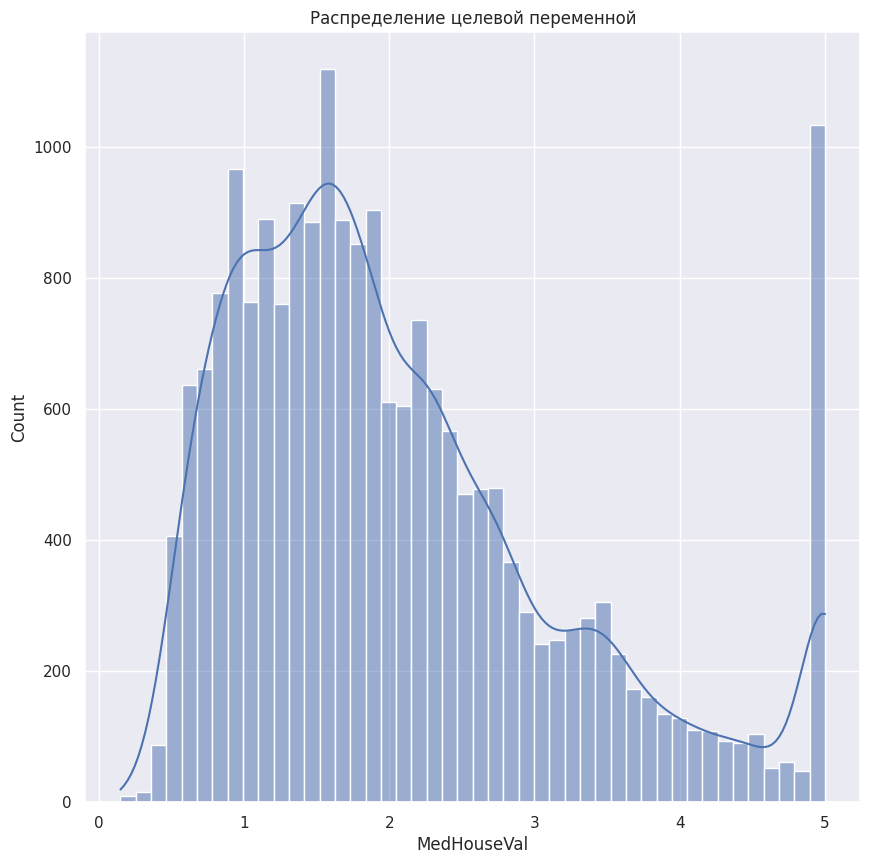

In [216]:
# @title график распределения целевой переменной
sns.histplot(y, kde=True)
plt.title('Распределение целевой переменной')
plt.show()

Последняя группа аномально выделяется. Скорее всего в данной группе имеются выбросы

## Посчитайте и выведите корреляционную матрицу. Убедитесь, что ячейки матрицы поделены на цветные категории, в ячейках указано числовое значение корреляции

a. Сделайте выводы

b. Удалите признаки на основании полученных значений, выводов

c. Повторите п. 3, п. 4 на измененных данных

Составим корреляционную матрицу всех числовых признаков набора данных и визуализируем её с помощью тепловой карты

In [117]:
# form correlation matrix
matrix = pd.DataFrame(data_df, columns=['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup','Latitude','Longitude','MedHouseVal'])
matrix.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<Axes: >

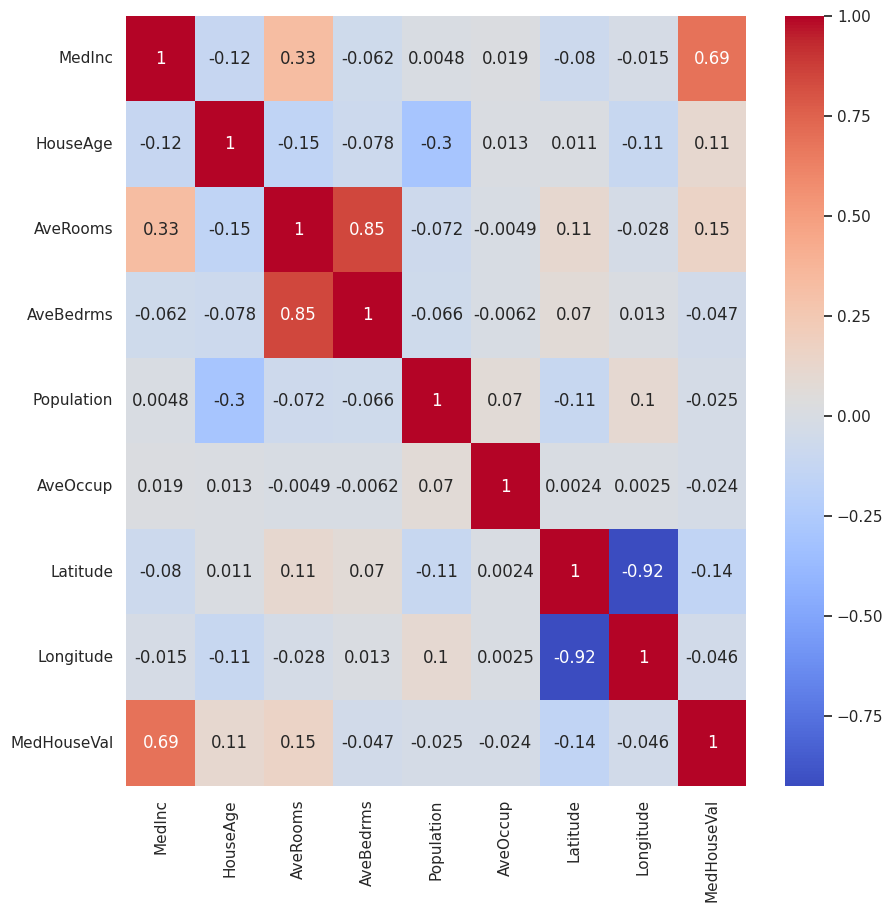

In [231]:
# визуализируем корреляционную матрицу при помощи тепловой карты
sns.set(rc={'figure.figsize':(10.0,10.0)})
sns.heatmap(matrix.corr(), annot=True, cmap='coolwarm')

1. Имеется довольно сильная корреляция между признаками AveRooms и AveBedrms - 0,85. Можно оставить только один признак, например AveBedrms.
2. Также имеется довольно сильная обратная корреляция между признаками Latitude и Longitude. В данном случае также можно оставить один признак, например Longitude

In [122]:
# удалим признаки AveRooms и latitude
data_df = data_df.drop(['AveRooms','Latitude'], axis=1)
data_df

,MedInc,HouseAge,AveBedrms,Population,AveOccup,Longitude,MedHouseVal
0,8.3252,41.0,1.023810,322.0,2.555556,-122.23,4.526
1,8.3014,21.0,0.971880,2401.0,2.109842,-122.22,3.585
2,7.2574,52.0,1.073446,496.0,2.802260,-122.24,3.521
3,5.6431,52.0,1.073059,558.0,2.547945,-122.25,3.413
4,3.8462,52.0,1.081081,565.0,2.181467,-122.25,3.422
...,...,...,...,...,...,...,...
20635,1.5603,25.0,1.133333,845.0,2.560606,-121.09,0.781
20636,2.5568,18.0,1.315789,356.0,3.122807,-121.21,0.771
20637,1.7000,17.0,1.120092,1007.0,2.325635,-121.22,0.923
20638,1.8672,18.0,1.171920,741.0,2.123209,-121.32,0.847


In [123]:
# сформируем матрицу признаков X и вектор целевых переменных y
X = data_df.drop(['MedHouseVal'], axis=1)
y = data_df['MedHouseVal']

In [124]:
# разделим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Построим модель линейной регрессии

In [125]:
# построим модель линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [126]:
model.coef_

array([ 4.35547145e-01,  1.85771545e-02,  5.64017638e-02,  3.71065973e-05,
       -4.36048279e-03, -9.98879154e-03])

In [127]:
model.intercept_

-1.4455291224482343

In [128]:
# выведем уравнение регрессии
print(f'Уравнение регрессии: y = {model.coef_[0]}*x1 + {model.coef_[1]}*x2 + ... + {model.intercept_}')

Уравнение регрессии: y = 0.43554714471367456*x1 + 0.018577154467774592*x2 + ... + -1.4455291224482343


In [129]:
y_pred = model.predict(X_test)
y_pred

array([1.03231119, 1.52124878, 2.36882168, ..., 4.35811364, 1.72219696,
       1.7037939 ])

In [130]:
y_test

,MedHouseVal
20046,0.47700
3024,0.45800
15663,5.00001
20484,2.18600
9814,2.78000
...,...
15362,2.63300
16623,2.66800
18086,5.00001
2144,0.72300


Вычислим метрики RMSE, R2 на обучающем и тестовом множестве

In [131]:
# Вычислим метрики RMSE на обучающем множестве
print(f'RMSE на обучающем множестве: {(mean_squared_error(y_train, model.predict(X_train))).round(5)}')
# Вычислим метрики RMSE на тестовом множестве
print(f'RMSE на тестовом множестве: {(mean_squared_error(y_test, model.predict(X_test))).round(5)}')

RMSE на обучающем множестве: 0.64679
RMSE на тестовом множестве: 0.66042


In [132]:
# вычислим коэффициента детерминации (R2) на обучающем множестве
print(f'Коэффициент детерминации (R2) на обучающем множестве: {round(model.score(X_train, y_train), 5)}')
# вычислим коэффициента детерминации (R2) на тестовом множестве
print(f'Коэффициент детерминации (R2) на тестовом множестве: {round(model.score(X_test, y_test), 5)}')

Коэффициент детерминации (R2) на обучающем множестве: 0.51616
Коэффициент детерминации (R2) на тестовом множестве: 0.49602


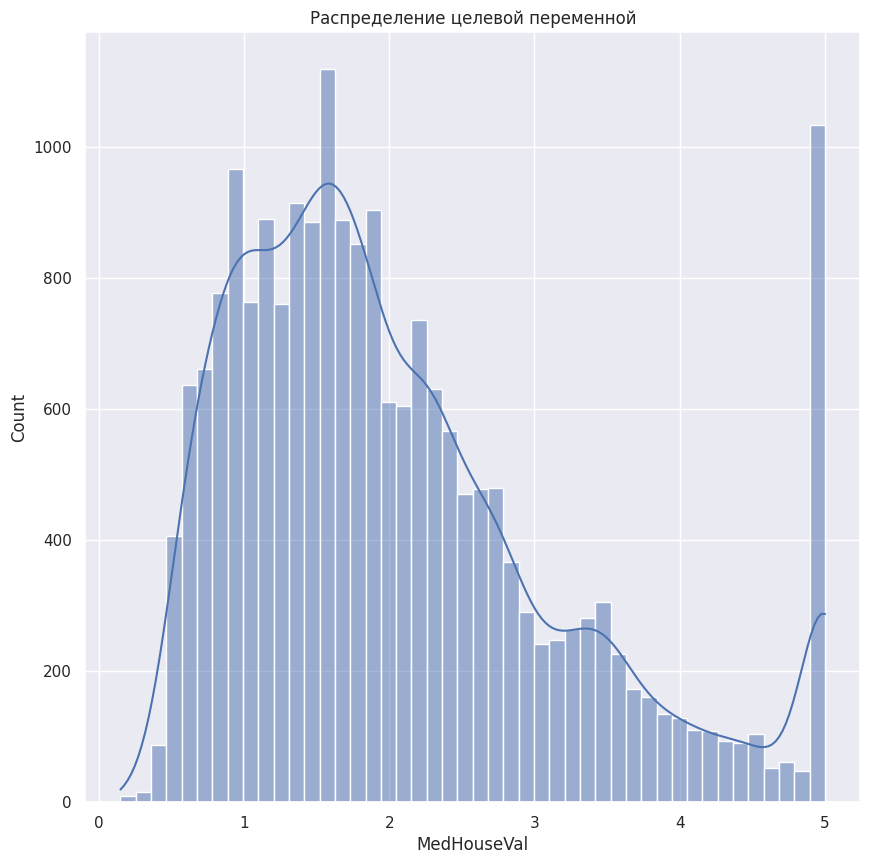

In [134]:
# @title график распределения целевой переменной
sns.histplot(y, kde=True)
plt.title('Распределение целевой переменной')
plt.show()

## Исследуйте оставленные признаки на выбросы

a. Удалите выбросы в случае обнаружения

b. Повторите п. 3, п. 4 на измененных данных

Проверим данные на выбросы и построим несколько визуализаций

In [160]:
# еще раз загрузим данные
data_df_1 = pd.DataFrame(fetch_california_housing().data, columns=fetch_california_housing().feature_names)
data_df_1['MedHouseVal'] = fetch_california_housing().target
data_df_1

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [141]:
data_df_1['MedInc'].value_counts()

,count
MedInc,
3.1250,49
15.0001,49
2.8750,46
2.6250,44
4.1250,44
...,...
4.0774,1
4.1767,1
6.1814,1


In [142]:
data_df_1['HouseAge'].value_counts()

,count
HouseAge,
52.0,1273
36.0,862
35.0,824
16.0,771
17.0,698
34.0,689
26.0,619
33.0,615
18.0,570


In [143]:
data_df_1['AveRooms'].value_counts()

,count
AveRooms,
5.000000,27
4.500000,22
4.000000,21
6.000000,20
5.333333,13
...,...
3.532286,1
4.793919,1
4.964602,1


In [144]:
data_df_1['AveBedrms'].value_counts()

,count
AveBedrms,
1.000000,288
1.125000,29
1.058824,26
1.100000,25
1.083333,25
...,...
0.932886,1
0.906883,1
1.164894,1


In [145]:
data_df_1['Population'].value_counts()

,count
Population,
891.0,25
761.0,24
1227.0,24
1052.0,24
850.0,24
...,...
2141.0,1
5546.0,1
3186.0,1


In [146]:
data_df_1['AveOccup'].value_counts()

,count
AveOccup,
3.000000,35
2.000000,18
2.500000,17
2.666667,16
2.333333,13
...,...
2.425926,1
2.942568,1
2.816254,1


In [147]:
data_df_1['Latitude'].value_counts()

,count
Latitude,
34.06,244
34.05,236
34.08,234
34.07,231
34.04,221
...,...
41.01,1
41.36,1
41.13,1


In [148]:
data_df_1['Longitude'].value_counts()

,count
Longitude,
-118.31,162
-118.30,160
-118.29,148
-118.27,144
-118.32,142
...,...
-123.54,1
-115.94,1
-115.99,1


In [149]:
data_df_1['MedHouseVal'].value_counts()

,count
MedHouseVal,
5.00001,965
1.37500,122
1.62500,117
1.12500,103
1.87500,93
...,...
3.59200,1
0.54900,1
3.77600,1


Построим боксплоты для анализа распределения значений столбцов и поиска выбросов

In [150]:
# посроим несколько бокслотов
def get_boxplot(X, columns=[]):
  for i in columns:
    fig, axes = plt.subplots(1, 1, figsize=(8, 2))
    sns.boxplot(x=X[i])

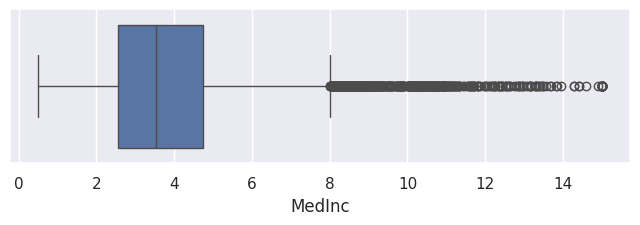

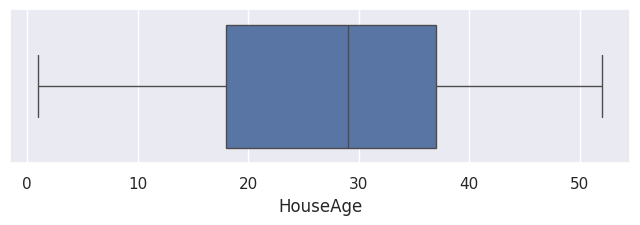

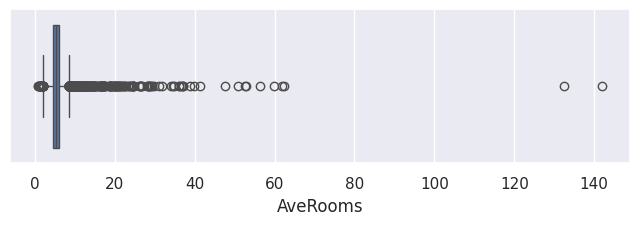

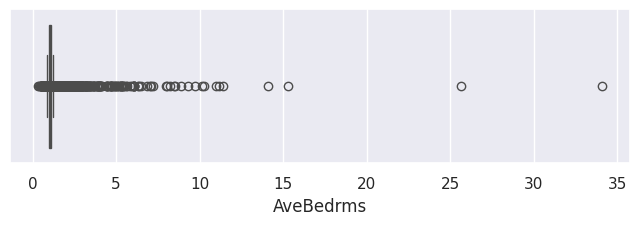

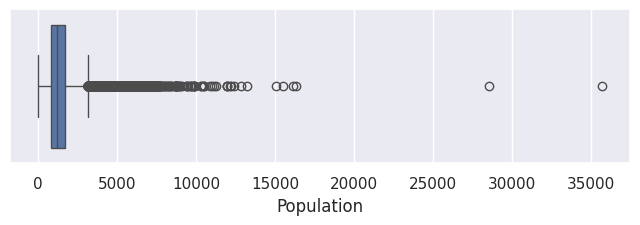

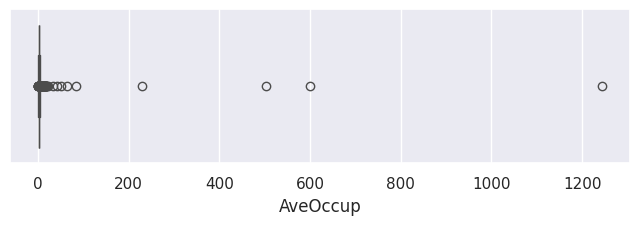

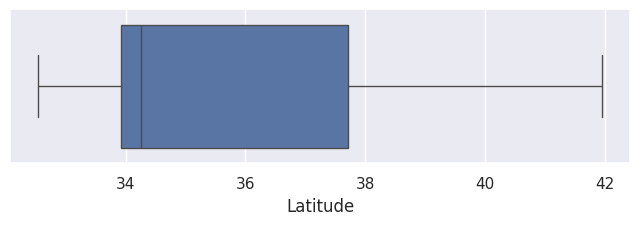

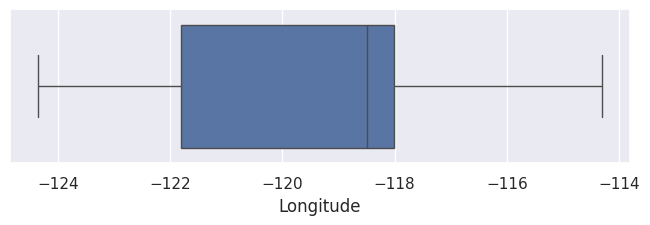

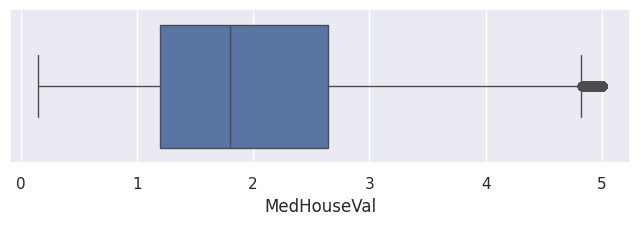

In [151]:
get_boxplot(data_df_1, columns=['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal'])

In [161]:
# посмотрим на значения столбца averooms больше 120
data_df_1[data_df_1['AveRooms'] > 120]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
1914,1.875,33.0,141.909091,25.636364,30.0,2.727273,38.91,-120.10,5.00001
1979,4.625,34.0,132.533333,34.066667,36.0,2.400000,38.80,-120.08,1.62500


In [162]:
# посмотрим на значения столбца population больше 25000
data_df_1[data_df_1['Population'] > 25000]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
9880,2.3087,11.0,5.364518,1.059684,28566.0,4.696810,36.64,-121.79,1.188
15360,2.5729,14.0,5.270497,1.010484,35682.0,7.482072,33.35,-117.42,1.344


In [163]:
# посмотрим на значения столбца  aveoccup больше 200
data_df_1[data_df_1['AveOccup'] > 200]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
3364,5.5179,36.0,5.142857,1.142857,4198.0,599.714286,40.41,-120.51,0.675
13034,6.1359,52.0,8.275862,1.517241,6675.0,230.172414,38.69,-121.15,2.250
16669,4.2639,46.0,9.076923,1.307692,6532.0,502.461538,35.32,-120.70,3.500
19006,10.2264,45.0,3.166667,0.833333,7460.0,1243.333333,38.32,-121.98,1.375


Имеются выбросы в признаках AveRooms, AveBedrms, Population и AveOccup. Удалим выбросы в данных

In [164]:
# удалим эти строки
data_df_1 = data_df_1[(data_df_1['AveRooms'] < 120) & (data_df_1['Population'] < 25000) & (data_df_1['AveOccup'] < 200)]

In [166]:
# сформируем матрицу признаков X и вектор целевых переменных y
X = data_df_1.drop(['MedHouseVal'], axis=1)
y = data_df_1['MedHouseVal']

In [167]:
# разделим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Построим модель линейной регрессии

In [168]:
# построим модель линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [169]:
model.coef_

array([ 4.34606718e-01,  9.93128875e-03, -1.07869904e-01,  6.77166656e-01,
        9.82348151e-06, -1.13061571e-01, -4.26343023e-01, -4.33218512e-01])

In [170]:
model.intercept_

-36.34414952219266

In [171]:
# выведем уравнение регрессии
print(f'Уравнение регрессии: y = {model.coef_[0]}*x1 + {model.coef_[1]}*x2 + ... + {model.intercept_}')

Уравнение регрессии: y = 0.4346067183658106*x1 + 0.009931288754867445*x2 + ... + -36.34414952219266


In [172]:
y_pred = model.predict(X_test)
y_pred

array([0.68661172, 2.28877836, 3.24155085, ..., 3.76040199, 2.19726395,
       2.64496447])

In [173]:
y_test

,MedHouseVal
13862,1.197
1710,1.578
9281,3.687
10790,4.070
19718,0.725
...,...
8263,2.200
20536,1.308
16022,3.941
2273,1.538


Вычислим метрики RMSE, R2 на обучающем и тестовом множестве

In [174]:
# Вычислим метрики RMSE на обучающем множестве
print(f'RMSE на обучающем множестве: {(mean_squared_error(y_train, model.predict(X_train))).round(5)}')
# Вычислим метрики RMSE на тестовом множестве
print(f'RMSE на тестовом множестве: {(mean_squared_error(y_test, model.predict(X_test))).round(5)}')

RMSE на обучающем множестве: 0.49352
RMSE на тестовом множестве: 0.51463


In [175]:
# вычислим коэффициента детерминации (R2) на обучающем множестве
print(f'Коэффициент детерминации (R2) на обучающем множестве: {round(model.score(X_train, y_train), 5)}')
# вычислим коэффициента детерминации (R2) на тестовом множестве
print(f'Коэффициент детерминации (R2) на тестовом множестве: {round(model.score(X_test, y_test), 5)}')

Коэффициент детерминации (R2) на обучающем множестве: 0.62892
Коэффициент детерминации (R2) на тестовом множестве: 0.61509


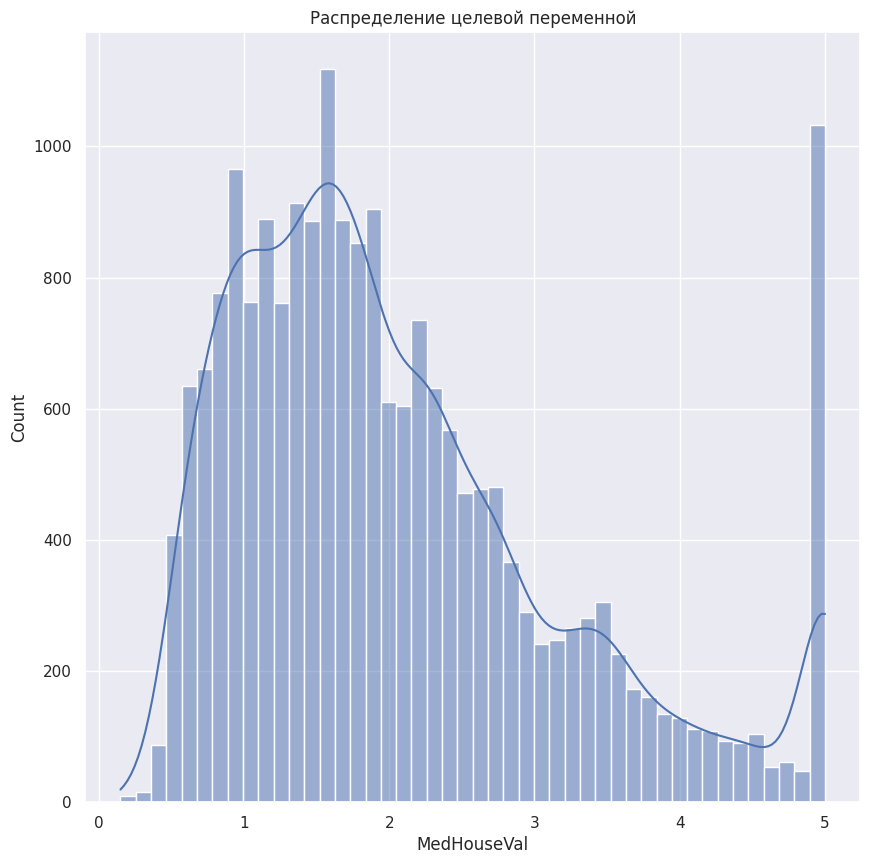

In [176]:
# @title график распределения целевой переменной
sns.histplot(y, kde=True)
plt.title('Распределение целевой переменной')
plt.show()

## Измените несколько признаков на выбор математически. Например, вычислите логарифм, возведите в квадрат, извлеките квадратный корень

a. Повторите п. 3, п. 4 на измененных данных

In [217]:
# еще раз загрузим данные
data_df_2 = pd.DataFrame(fetch_california_housing().data, columns=fetch_california_housing().feature_names)
data_df_2['MedHouseVal'] = fetch_california_housing().target
data_df_2

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [218]:
# сформируем новые признаки
data_df_2['BedroomsPerHouse'] = data_df_2['AveBedrms'] / data_df_2['HouseAge']
data_df_2['Population'] = np.log(data_df_2['Population'])
data_df_2['AveOccup'] = np.sqrt(data_df_2['AveOccup'])
data_df_2['HouseAge'] = np.power(data_df_2['HouseAge'], 2)

In [219]:
data_df_2

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,BedroomsPerHouse
0,8.3252,1681.0,6.984127,1.023810,5.774552,1.598611,37.88,-122.23,4.526,0.024971
1,8.3014,441.0,6.238137,0.971880,7.783641,1.452529,37.86,-122.22,3.585,0.046280
2,7.2574,2704.0,8.288136,1.073446,6.206576,1.673995,37.85,-122.24,3.521,0.020643
3,5.6431,2704.0,5.817352,1.073059,6.324359,1.596228,37.85,-122.25,3.413,0.020636
4,3.8462,2704.0,6.281853,1.081081,6.336826,1.476979,37.85,-122.25,3.422,0.020790
...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,625.0,5.045455,1.133333,6.739337,1.600189,39.48,-121.09,0.781,0.045333
20636,2.5568,324.0,6.114035,1.315789,5.874931,1.767147,39.49,-121.21,0.771,0.073099
20637,1.7000,289.0,5.205543,1.120092,6.914731,1.525003,39.43,-121.22,0.923,0.065888
20638,1.8672,324.0,5.329513,1.171920,6.608001,1.457124,39.43,-121.32,0.847,0.065107


In [220]:
# сформируем матрицу признаков X и вектор целевых переменных y
X = data_df_2.drop(['MedHouseVal'], axis=1)
y = data_df_2['MedHouseVal']

In [221]:
# разделим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Построим модель линейной регрессии

In [222]:
# построим модель линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [223]:
model.coef_

array([ 4.42987886e-01,  1.74798529e-04, -1.13548822e-01,  7.35784472e-01,
        1.89049866e-02, -3.29378128e-01, -4.17650065e-01, -4.25141679e-01,
       -1.15364649e-01])

In [224]:
model.intercept_

-35.52604774739446

In [225]:
# выведем уравнение регрессии
print(f'Уравнение регрессии: y = {model.coef_[0]}*x1 + {model.coef_[1]}*x2 + ... + {model.intercept_}')

Уравнение регрессии: y = 0.44298788600361877*x1 + 0.00017479852911438034*x2 + ... + -35.52604774739446


In [226]:
y_pred = model.predict(X_test)
y_pred

array([0.62330466, 1.76501966, 2.92527373, ..., 4.43771088, 1.21635661,
       1.93469038])

In [227]:
y_test

,MedHouseVal
20046,0.47700
3024,0.45800
15663,5.00001
20484,2.18600
9814,2.78000
...,...
15362,2.63300
16623,2.66800
18086,5.00001
2144,0.72300


Вычислим метрики RMSE, R2 на обучающем и тестовом множестве

In [228]:
# Вычислим метрики RMSE на обучающем множестве
print(f'RMSE на обучающем множестве: {(mean_squared_error(y_train, model.predict(X_train))).round(5)}')
# Вычислим метрики RMSE на тестовом множестве
print(f'RMSE на тестовом множестве: {(mean_squared_error(y_test, model.predict(X_test))).round(5)}')

RMSE на обучающем множестве: 0.49745
RMSE на тестовом множестве: 0.52543


In [229]:
# вычислим коэффициента детерминации (R2) на обучающем множестве
print(f'Коэффициент детерминации (R2) на обучающем множестве: {round(model.score(X_train, y_train), 5)}')
# вычислим коэффициента детерминации (R2) на тестовом множестве
print(f'Коэффициент детерминации (R2) на тестовом множестве: {round(model.score(X_test, y_test), 5)}')

Коэффициент детерминации (R2) на обучающем множестве: 0.62787
Коэффициент детерминации (R2) на тестовом множестве: 0.59904


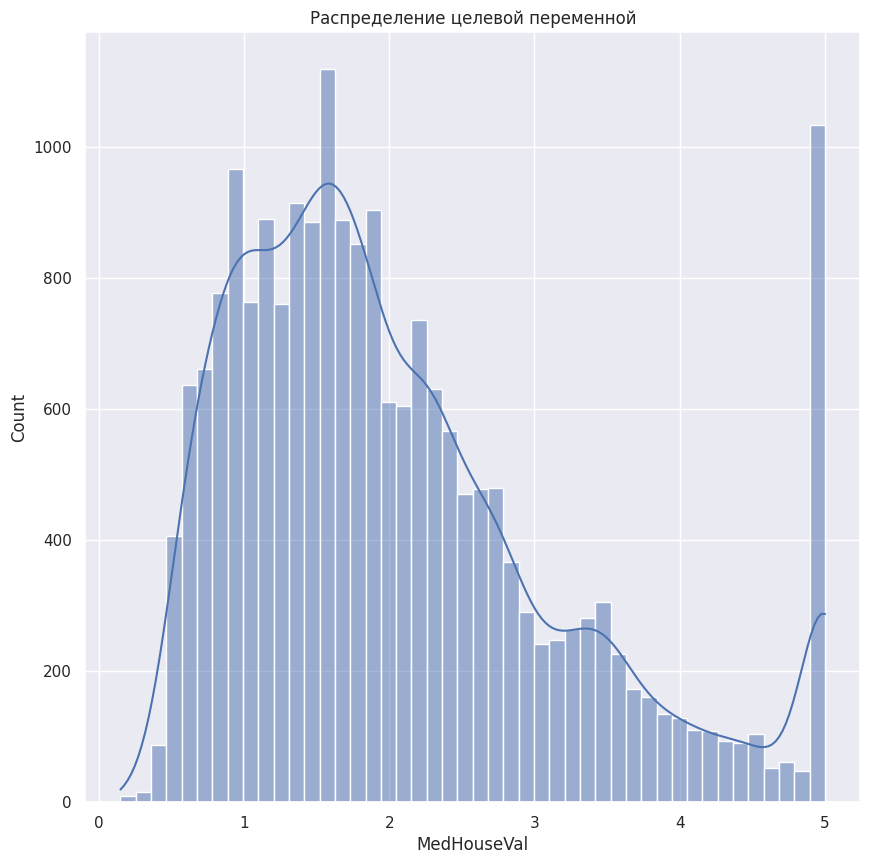

In [230]:
# @title график распределения целевой переменной
sns.histplot(y, kde=True)
plt.title('Распределение целевой переменной')
plt.show()

## Сформулируйте выводы по проделанной работе

a. Кратко опишите какие преобразования были сделаны с данными

b. Сравните метрики всех моделей. Желательно оформление в виде таблицы вида |модель|RMSE|R2|признаки, на которых проводилось обучение с указанием их преобразований|

c. Напишите свое мнение, в полной ли мере модели справились с поставленной задачей

В работе оценивалась модеь линейной регресси, построенная различными способами:
1. На первом этапе, после загрузки данных, разведочного анализа данных была построена модель линейной регрессии и вычислены метрики RMSE и R2
2. Далее была построена корреляционная матрица признаков и вычислена корреляция между признаками. После этого были удалены два признака - AveRooms и latitude и снова постороена модель линейной регрессии
3. Далее была проверена гипотеза, как выбросы могут повлиять на модель линейной регрессии. Были удалены выбросы и построена модель линейной регрессии без выбросов
4. В последнюю очередь в исходные данные были добавлены 4 новых признака на основе существующих и также была построена модель линейной регрессии

Сравнение метрик качества всех построеных моделей:

Модель 1:

RMSE на тестовом множестве: 0.55589

Коэффициент детерминации (R2) на тестовом множестве: 0.57579

Модель 2 (после удаления корреляционных признаков):

RMSE на тестовом множестве: 0.66042

Коэффициент детерминации (R2) на тестовом множестве: 0.49602

Модель 3 (после удаления выбросов):

RMSE на тестовом множестве: 0.51463

Коэффициент детерминации (R2) на тестовом множестве: 0.61509

Модель 4 (после вычисления новых признаков на основе существующих):

RMSE на тестовом множестве: 0.52543

Коэффициент детерминации (R2) на тестовом множестве: 0.59904



Преобразование данных может как ухудшить, так и улучшить качество модели, необходимо очень аккуратно подходить к преобразованиям, чтобы как минимум не ухудшить, а лучше добиться наиболее лучшего результата.

Все построенные в рамках данной работы модели корректны и могут быть использованы в дальнейшем, но выбор конкретной модели зависит от целей и задач исследования